In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
train = pd.read_csv("train_data.csv")

In [ ]:
train.info()

In [ ]:
train.memory_usage().sum() / 1024**2

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [ ]:
train = import_data("train_data.csv")

In [ ]:
train.info()

In [ ]:
train.memory_usage(index=False)

In [ ]:
test = import_data("test_data_hidden.csv")

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train['year'] = pd.to_datetime(train['Date']).dt.year
test['year'] = pd.to_datetime(test['Date']).dt.year

In [ ]:
train = train[train['year'] != 2013]

In [ ]:
train = train[train.Open == 1]

In [ ]:
test.isnull().sum()

In [ ]:
train.describe()

In [ ]:
train.columns

In [ ]:
for column in train:
    if column != 'Date':
        print(column,'\n','Unique values: ', train[column].unique(),'\n', 
              'number of unique values', train[column].nunique(), '\n', '-'*100)

In [ ]:
train["StateHoliday"] = train["StateHoliday"].replace({"0":0, "a":1, "b":2, "c":3})

train["Month"]= pd.to_datetime(train["Date"]).dt.month
train["Day"]= pd.to_datetime(train["Date"]).dt.day

train.drop(['Date', 'Customers'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
test["StateHoliday"] = test["StateHoliday"].replace({"0":0, "a":1, "b":2, "c":3})

test["Month"]= pd.to_datetime(test["Date"]).dt.month
test["Day"]= pd.to_datetime(test["Date"]).dt.day

test.drop(['Date', 'Customers'], axis=1, inplace=True)

In [ ]:
train_dummies = pd.get_dummies(data=train, columns=['Store'])

In [ ]:
train_dummies.memory_usage().sum() / 1024**2
#before reduce_size:- 623.11692237854 

In [ ]:
test = reduce_mem_usage(test)

In [ ]:
test_dummies = pd.get_dummies(data=test, columns=['Store'])

In [ ]:
test_dummies.memory_usage().sum() / 1024**2

In [ ]:
train_dummies.head()

In [ ]:
train_dummies.info()

In [ ]:
train_dummies.memory_usage(index=False)

In [ ]:
test_dummies.head()

In [ ]:
train_dummies.shape

In [ ]:
test_dummies.shape

In [217]:
test_dummies.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,year,Month,Day,Store_1,...,Store_1106,Store_1107,Store_1108,Store_1109,Store_1110,Store_1111,Store_1112,Store_1113,Store_1114,Store_1115
0,5,5263,1,1,0,1,2015,7,31,1,...,0,0,0,0,0,0,0,0,0,0
1,5,6064,1,1,0,1,2015,7,31,0,...,0,0,0,0,0,0,0,0,0,0
2,5,8314,1,1,0,1,2015,7,31,0,...,0,0,0,0,0,0,0,0,0,0
3,5,13995,1,1,0,1,2015,7,31,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4822,1,1,0,1,2015,7,31,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
X_train = train_dummies.drop('Sales', axis=1)
y_train = train_dummies['Sales']

X_test = test_dummies.drop('Sales', axis=1)
y_test = test_dummies['Sales']

In [222]:
for column in test:
    if column != 'Date':
        print(column,'\n','Unique values: ', train[column].unique(),'\n', 
              'number of unique values', train[column].nunique(), '\n', '-'*100)

Store 
 Unique values:  [   1    2    3 ... 1113 1114 1115] 
 number of unique values 1115 
 ----------------------------------------------------------------------------------------------------
DayOfWeek 
 Unique values:  [2 1 7 6 5 4 3] 
 number of unique values 7 
 ----------------------------------------------------------------------------------------------------
Sales 
 Unique values:  [ 5735  9863 13261 ... 16841 19794 21614] 
 number of unique values 19754 
 ----------------------------------------------------------------------------------------------------
Open 
 Unique values:  [1.] 
 number of unique values 1 
 ----------------------------------------------------------------------------------------------------
Promo 
 Unique values:  [1. 0.] 
 number of unique values 2 
 ----------------------------------------------------------------------------------------------------
StateHoliday 
 Unique values:  [0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3] 
 number of unique values 4 

In [154]:
X_test.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,Month,Day,Store_1,Store_2,...,Store_1106,Store_1107,Store_1108,Store_1109,Store_1110,Store_1111,Store_1112,Store_1113,Store_1114,Store_1115
0,5,1,1,0,1,2015,7,31,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,1,0,1,2015,7,31,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,0,1,2015,7,31,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,1,0,1,2015,7,31,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,2015,7,31,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
y_test.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int16

# Linear Regression

In [159]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = lr.predict(X_test)
ind=X_test[X_test.Open == 0].index
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for training set is:  0.6931806264855469
RMSE for training set is:  1503.4992107852731
MAE for training set is:  1077.311247437067
R-squared error for testing set is:  0.8808065482467128
RMSE for testing set is:  1213.3973367361398
MAE for testing set is:  860.053526417619


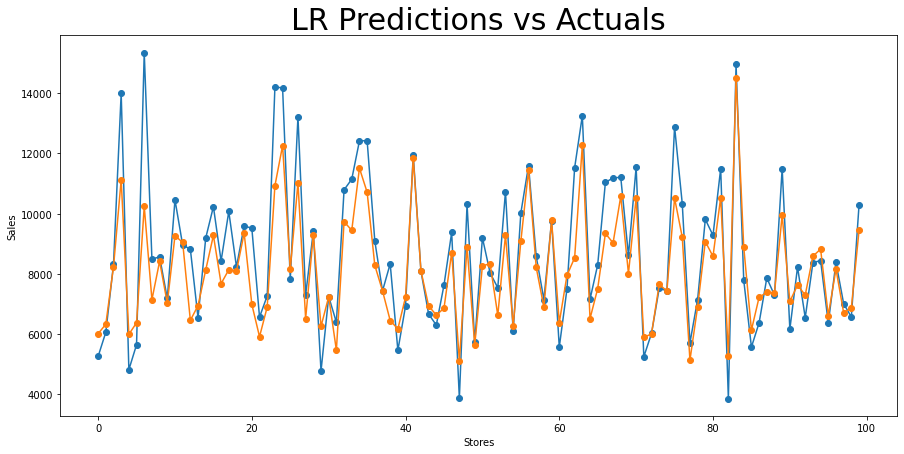

In [179]:
plt.figure(figsize=(15,7))
plt.plot(y_test[:100], marker='o')
plt.plot(test_pred[:100], marker='o')
plt.title('LR Predictions vs Actuals', size='30')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

In [79]:
def predict_price(DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,Month,Day,Store):    
    loc_index = np.where(X_test.columns==Store)[0][0]
    
    x = np.zeros(len(X_test.columns))
    x[0] = DayOfWeek
    x[1] = Open
    x[2] = Promo
    x[3] = StateHoliday
    x[4] = SchoolHoliday
    x[5] = year
    x[6] = Month
    x[7] = Day
    
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [80]:
predict_price(5,1,1,0,1,2015,7,31,'Store_1')

6017.84375

In [81]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge Regression

In [82]:
ridge = Ridge()

ridge.fit(X_train, y_train)
train_pred = lr.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = ridge.predict(X_test)
ind=X_test[X_test.Open == 0].index
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error(test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))

R-squared error for training set is:  0.6931806264855469
RMSE for training set is:  1503.4992107852731
MAE for training set is:  1077.311247437067
R-squared error for testing set is:  0.8806443052772656
RMSE for testing set is:  1213.1415360628096
MAE for testing set is:  860.0445223045427


# Decision Tree Regressor

In [84]:
dt_reg = DecisionTreeRegressor(max_depth=10,max_features=1000)

dt_reg.fit(X_train, y_train)
train_pred = dt_reg.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error(train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = dt_reg.predict(X_test)
for i in ind:
    test_pred[i] = 0

print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))

R-squared error for training set is:  -1.0608225347835725
RMSE for training set is:  2545.795995421883
MAE for training set is:  1898.316143156339
R-squared error for testing set is:  0.30513275062356204
RMSE for testing set is:  2307.955274207968
MAE for testing set is:  1609.5561087211772


# Random Forest

In [85]:
rf_reg = RandomForestRegressor(n_estimators=500,
                               max_features='sqrt',
                               max_depth=6,
                               random_state=0,
                               n_jobs=7
                              )

rf_reg.fit(X_train, y_train)

train_pred = rf_reg.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)

test_pred = rf_reg.predict(X_test)
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))

R-squared error for training set is:  -87.10524835476534
RMSE for training set is:  2902.906809931425
MAE for training set is:  2171.496663355346 


R-squared error for testing set is:  -0.18744072608563034
RMSE for testing set is:  2572.0928010123607
MAE for testing set is:  1804.9207684206665


# PCA

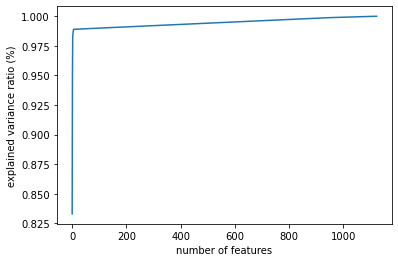

In [87]:
pca = PCA()
pca.fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('explained variance ratio (%)')
plt.show()

In [89]:
pca = PCA(n_components=10)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [91]:
X_test_pca.shape

(34565, 10)

In [92]:
X_train_pca.shape

(476261, 10)

# Random Forest with PCA

In [94]:
rf_reg.fit(X_train_pca, y_train)

train_pred = rf_reg.predict(X_train_pca)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)

test_pred = rf_reg.predict(X_test_pca)
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for training set is:  -2.5243571639469304
RMSE for training set is:  2631.7930399132697
MAE for training set is:  1921.0183320298104 


R-squared error for testing set is:  0.14900116078131487
RMSE for testing set is:  2427.0248978469504
MAE for testing set is:  1668.8962099146536


# Gradient Boosting

In [100]:
gbr = GradientBoostingRegressor(max_depth=10,max_features=500)
gbr.fit(X_train, y_train)

train_pred = gbr.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)


test_pred = gbr.predict(X_test)
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for training set is:  -0.11611244223552619
RMSE for training set is:  1963.4748658705796
MAE for training set is:  1578.5112265659998 


R-squared error for testing set is:  0.5960840321289601
RMSE for testing set is:  1831.8900535151756
MAE for testing set is:  1378.937660287607


In [102]:
from xgboost import XGBRegressor

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(476261, 1123)
(476261,)
(34565, 1123)
(34565,)


In [184]:
import xgboost

In [231]:
train_dmatrix = xgboost.DMatrix(data = X_train, label = y_train,  enable_categorical=True)
test_dmatrix = xgboost.DMatrix(data = X_test, label = y_test)

# XG Boost 1

In [238]:
xgb = xgboost.train(dtrain=train_dmatrix, params={"booster":"gblinear", "objective":"reg:linear"})
test_pred = xgb.predict(test_dmatrix)

train_pred = xgb.predict(train_dmatrix)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)

for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


[12:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R-squared error for training set is:  0.67448142739487
RMSE for training set is:  1548.0590009627288
MAE for training set is:  1112.510393866723 


R-squared error for testing set is:  0.872122184870418
RMSE for testing set is:  1251.6945
MAE for testing set is:  884.067


# XG Boost 2

In [242]:
X_train1 = X_train.drop('StateHoliday', axis=1)
X_test1 = X_test.drop('StateHoliday', axis=1)
xgb = XGBRegressor(n_estimator=500, learning_rate=0.5, max_depth=6, n_jobs=-1)
xgb.fit(X_train1, y_train)

train_pred = xgb.predict(X_train1)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)


test_pred = xgb.predict(X_test1)
for i in ind:
    test_pred[i] = 0
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


[12:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R-squared error for training set is:  0.5664971055419539
RMSE for training set is:  1502.9211906427759
MAE for training set is:  1164.877779200644 


R-squared error for testing set is:  0.80266958297735
RMSE for testing set is:  1392.3317
MAE for testing set is:  1036.3427
